# Project : Predict housing values in Boston

# 1. Introduction 
Housing values is always a popular topic which people want to have an in-depth understanding. A set of data about house values in one of the suburbs in Boston is collected and uploaded in open source. This project to build the most suitable machine learning pipeline to predict the housing value so the investors can make investing dedicion that will benefit them the most.


# 2. Building Machine Learning Pipeline

## Import all the neccesary libraries

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

## Data exploration

### Loading the dataset

In [90]:
df = pd.read_csv ("../../datasets/data.csv")
print(f'Dimensions of the Dataset {df.shape}')
df.head(10)

Dimensions of the Dataset (511, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [91]:
df_train, df_test = train_test_split(df, test_size=0.2)
print(f'df_train: {df_train.shape}.')
print(f'df_test: {df_test.shape}.')

df_train: (408, 14).
df_test: (103, 14).


In [92]:
df_train.info()
df_train.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 337 to 455
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     408 non-null    float64
 1   ZN       408 non-null    float64
 2   INDUS    408 non-null    float64
 3   CHAS     408 non-null    int64  
 4   NOX      408 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      408 non-null    float64
 7   DIS      408 non-null    float64
 8   RAD      408 non-null    int64  
 9   TAX      408 non-null    int64  
 10  PTRATIO  408 non-null    float64
 11  B        408 non-null    float64
 12  LSTAT    408 non-null    float64
 13  MEDV     408 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.8 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,408.00,408.00,408.00,408.00,408.00,404.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00
mean,3.45,11.72,11.10,0.07,0.55,6.28,67.97,3.84,9.20,401.06,18.54,356.05,12.85,22.71
std,8.80,24.09,6.87,0.25,0.11,0.68,28.34,2.13,8.56,166.54,2.20,92.46,8.09,9.42
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.18,0.00,0.45,5.88,42.70,2.11,4.00,278.50,17.40,375.91,6.84,17.20
50%,0.25,0.00,9.12,0.00,0.54,6.20,76.50,3.32,5.00,329.00,19.10,391.70,11.30,21.30
75%,2.79,12.50,18.10,0.00,0.62,6.63,93.65,5.22,8.00,666.00,20.20,396.22,16.71,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,23.00,396.90,76.00,67.00


## Feature Engineering 

## Data Analysis

### Statistical data 

In [93]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


### Checking Outlier using seaborn boxplot

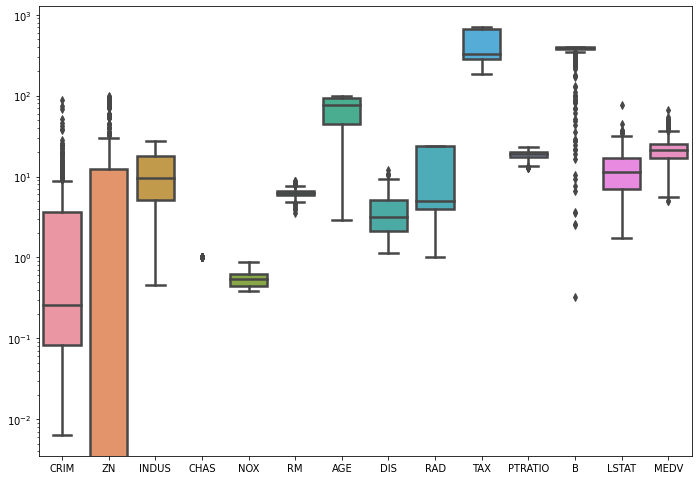

In [94]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=df,linewidth=2.5,ax=ax)
g.set_yscale("log")

Observation: There are some outliers 

### Checking Outlier using multivariate analysis

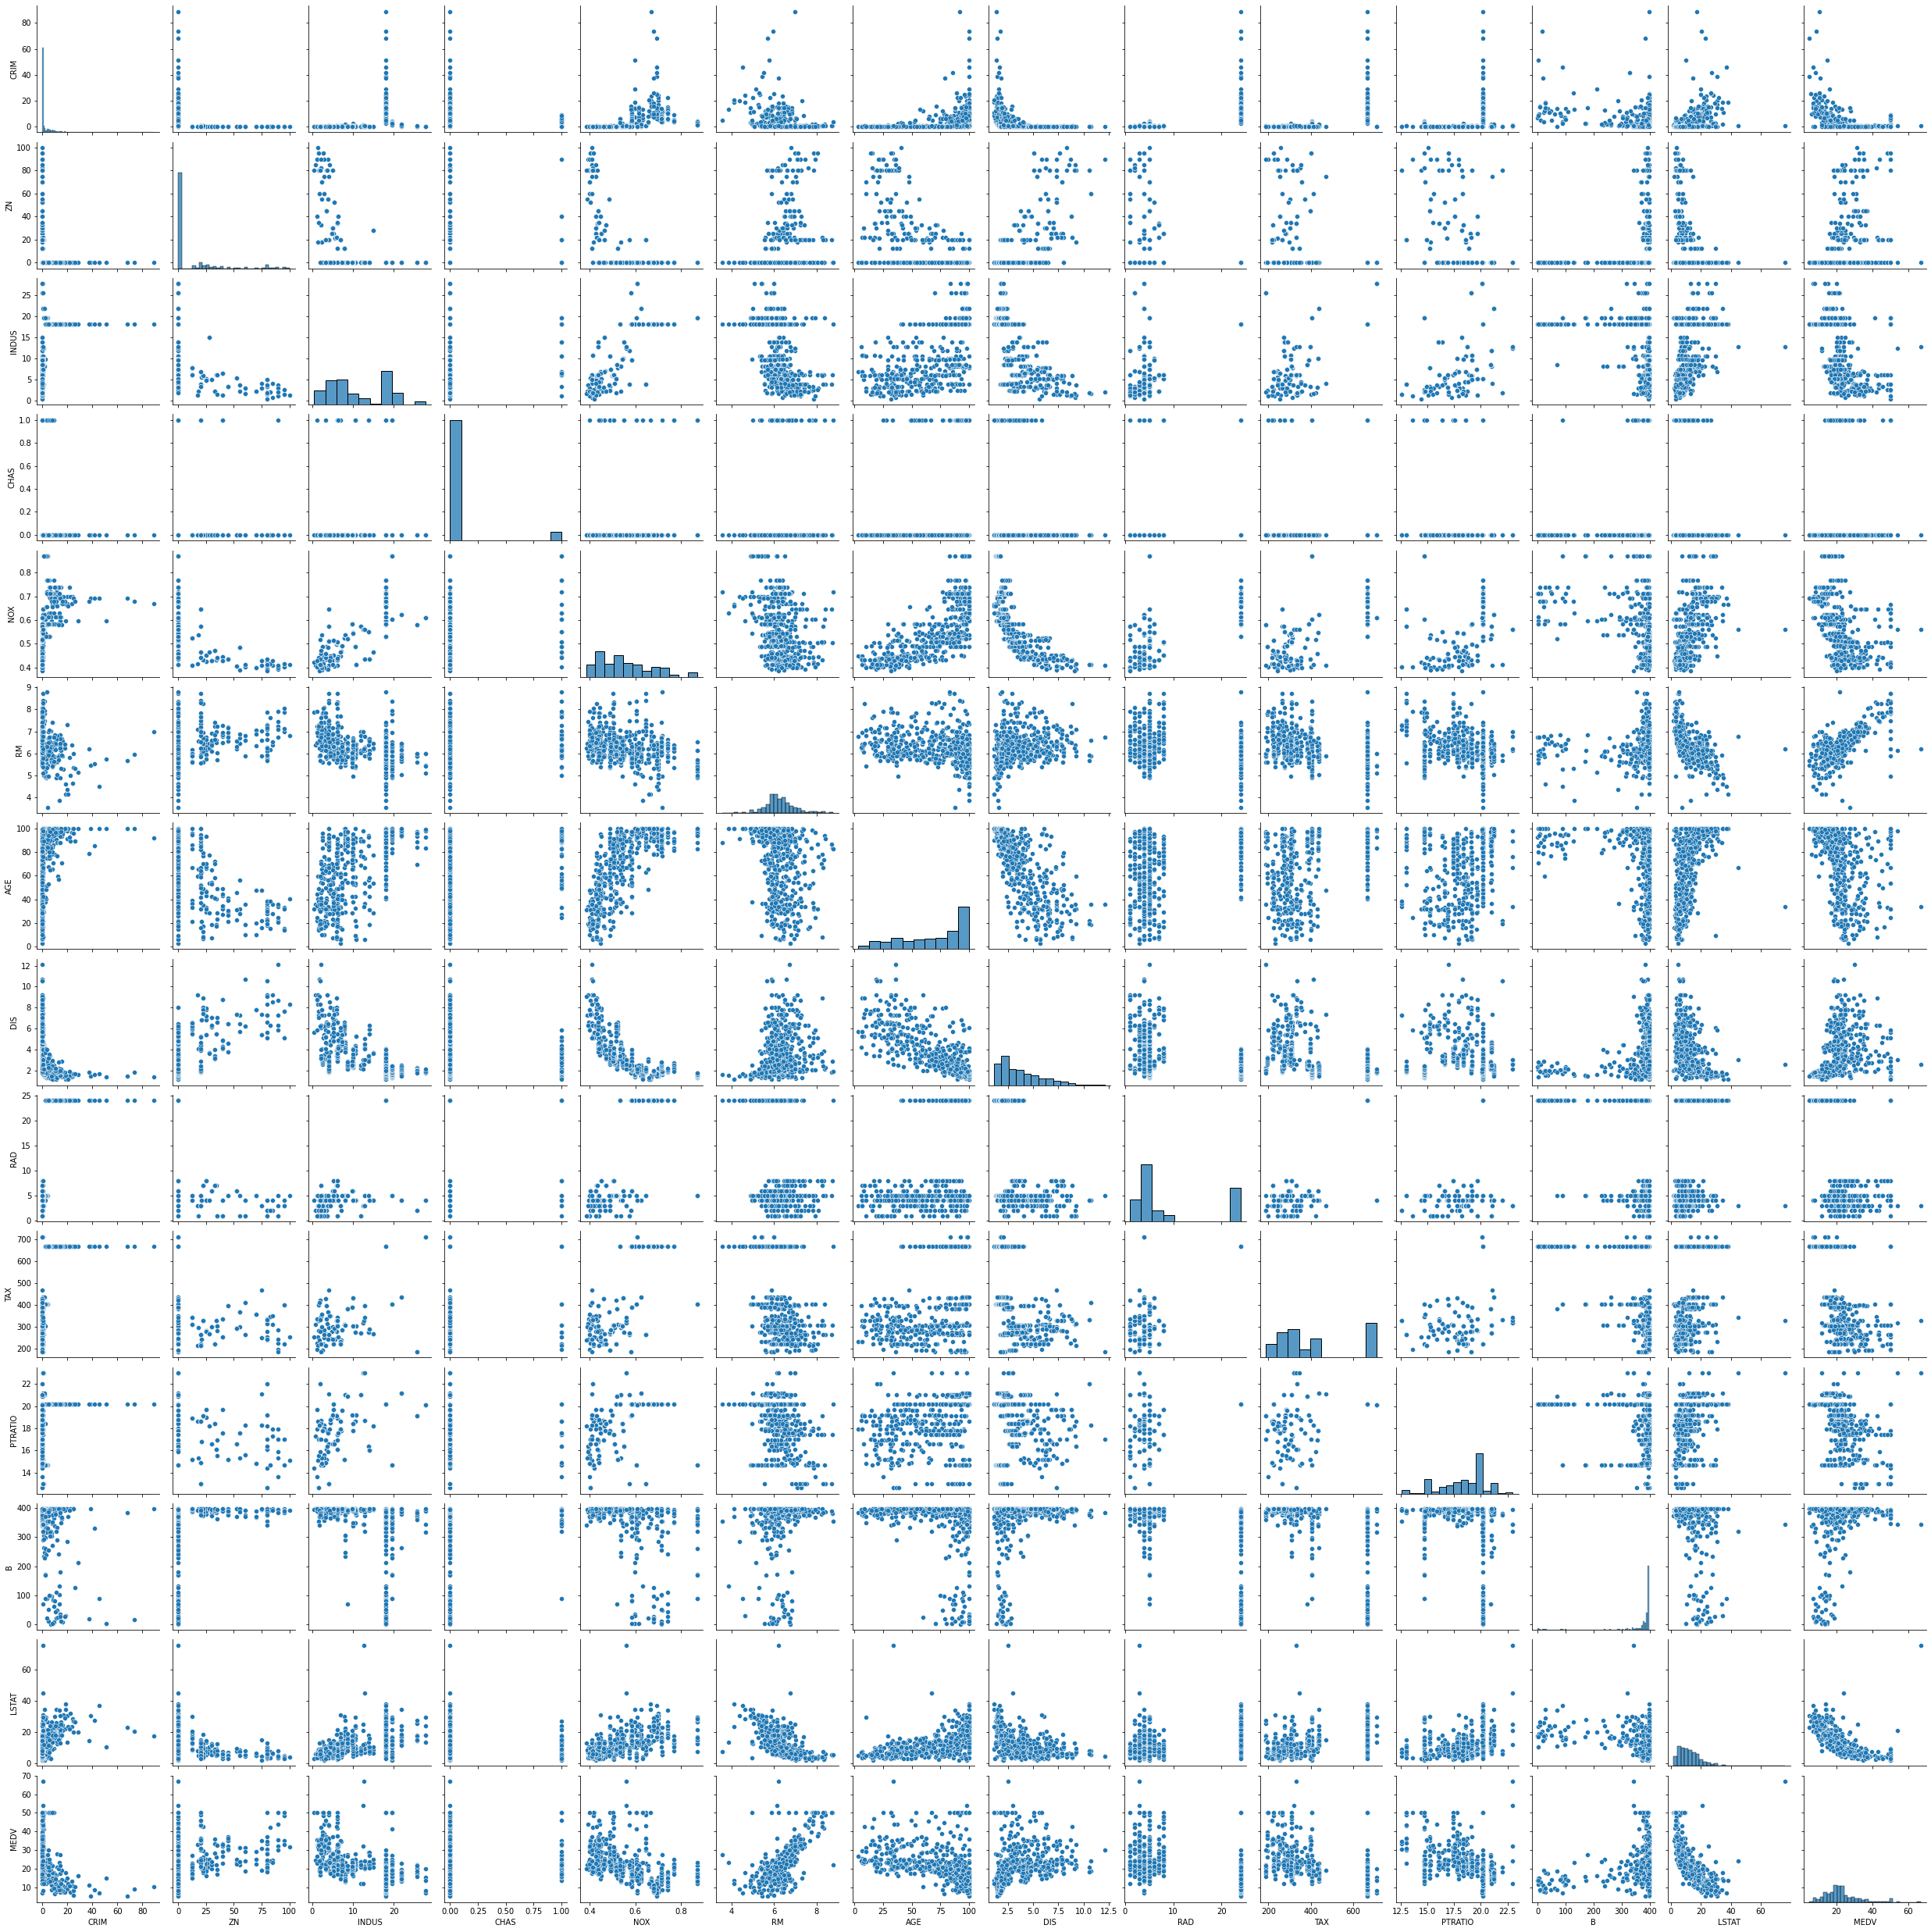

In [95]:
sns.pairplot(df)

### Checking the corelation

In [96]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.198451,0.405524,-0.054906,0.420524,-0.220363,0.350847,-0.377028,0.625964,0.583389,0.276695,-0.384356,0.405030,-0.380072
ZN,-0.198451,1.000000,-0.534106,-0.041333,-0.516256,0.307812,-0.567796,0.665185,-0.307146,-0.311531,-0.392844,0.175637,-0.390029,0.339767
INDUS,0.405524,-0.534106,1.000000,0.062332,0.763583,-0.392193,0.642817,-0.707886,0.591784,0.718764,0.379441,-0.356955,0.556707,-0.463269
CHAS,-0.054906,-0.041333,0.062332,1.000000,0.091023,0.089952,0.085814,-0.097541,-0.005343,-0.034244,-0.124415,0.048970,-0.057013,0.164782
NOX,0.420524,-0.516256,0.763583,0.091023,1.000000,-0.301778,0.729233,-0.768309,0.609343,0.666982,0.186073,-0.379936,0.540050,-0.411486
RM,-0.220363,0.307812,-0.392193,0.089952,-0.301778,1.000000,-0.237335,0.199853,-0.213078,-0.293969,-0.339755,0.127888,-0.553126,0.667695
AGE,0.350847,-0.567796,0.642817,0.085814,0.729233,-0.237335,1.000000,-0.745097,0.452229,0.503360,0.258251,-0.271925,0.529994,-0.368203
DIS,-0.377028,0.665185,-0.707886,-0.097541,-0.768309,0.199853,-0.745097,1.000000,-0.488474,-0.530379,-0.238155,0.290997,-0.467063,0.233469
RAD,0.625964,-0.307146,0.591784,-0.005343,0.609343,-0.213078,0.452229,-0.488474,1.000000,0.910211,0.438646,-0.442406,0.422389,-0.379016
TAX,0.583389,-0.311531,0.718764,-0.034244,0.666982,-0.293969,0.503360,-0.530379,0.910211,1.000000,0.440962,-0.440830,0.482088,-0.459274


Observation: correlation is negative so it means if one variable increases other variable decreases

In [97]:
relation = df.corr()
relation_index=relation.index
relation_index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

<AxesSubplot:>

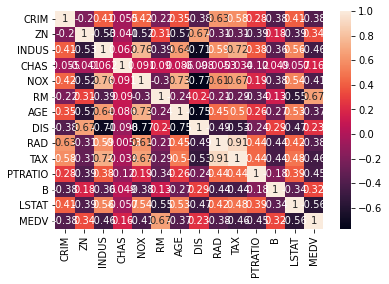

In [98]:
sns.heatmap(df[relation_index].corr(),annot=True)

### Finding null-value data

In [99]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Observation: There are missing values in the dataset

### Visualisation of missing value

<AxesSubplot:>

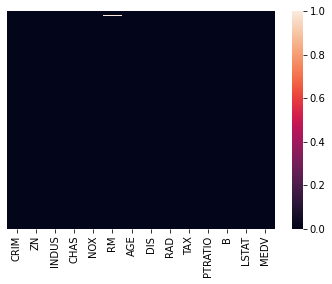

In [100]:
sns.heatmap(df.isnull(),yticklabels=False)

## Feature Selection

In [101]:
df_train = df_train.dropna()

In [102]:
x_train = df_train.drop(['MEDV'], axis=1)
y_train = df_train['MEDV']
x_test = df_test.drop(['MEDV'], axis=1)
y_test = df_test['MEDV']

print(f'Training and Test Datasets are ready with the following dimensions:\n \
x_train: {x_train.shape}\n x_test: {x_test.shape}\n \
y_train: {y_train.shape}\n y_test: {y_test.shape}')

Training and Test Datasets are ready with the following dimensions:
 x_train: (404, 13)
 x_test: (103, 13)
 y_train: (404,)
 y_test: (103,)


### Observe dataset after cleaning

In [103]:
df_train.info()
df_train.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 337 to 455
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,3.49,11.78,11.12,0.07,0.55,6.28,67.95,3.84,9.24,401.88,18.53,355.67,12.86,22.72
std,8.84,24.18,6.86,0.25,0.11,0.68,28.42,2.13,8.59,167.03,2.20,92.83,8.12,9.47
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.88,42.38,2.10,4.00,278.50,17.40,375.32,6.77,17.20
50%,0.26,0.00,9.69,0.00,0.54,6.20,76.60,3.30,5.00,329.00,19.10,391.38,11.30,21.30
75%,2.84,12.50,18.10,0.00,0.62,6.63,93.65,5.22,8.00,666.00,20.20,396.22,16.71,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,23.00,396.90,76.00,67.00


# Linear Regression model

### Lasso

In [105]:
params_lr = {'alpha' : np.arange(0, 1, 0.01)}

lr = GridSearchCV(Lasso(), param_grid=params_lr, scoring='r2', n_jobs=-1)
lr.fit(x_train, y_train)

print(lr.best_score_)

0.5748250101588559


### Ridge

In [45]:
params_rr = {'alpha' : np.arange(0, 1, 0.01)}

rr = GridSearchCV(Ridge(), param_grid=params_rr, scoring='r2', n_jobs=-1)
rr.fit(x_train, y_train)

print(rr.best_score_)

0.5175016637941143


### ElasticNet

In [47]:
params_enr = {
    'alpha' : [100, 10, 1, 0.1, 0.01, 0.001],
    'l1_ratio': np.arange(0.0, 1.0, 0.1)
}

enr = GridSearchCV(ElasticNet(), param_grid=params_enr, scoring='r2', n_jobs=-1)
enr.fit(x_train, y_train)

print(enr.best_score_)

0.5174764949332445


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7035.209804987841, tolerance: 3.8472764261083743
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8165.172959767576, tolerance: 3.063624603076923
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9113.933757346833, tolerance: 3.1052952307692308
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective d

# Decision Tree Regression Model

In [106]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1], df_train.iloc[:,-1], test_size=0.3, random_state=0)

In [108]:
from sklearn.tree import DecisionTreeRegressor

In [109]:
reg_decision_model=DecisionTreeRegressor()

In [110]:
reg_decision_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [111]:
reg_decision_model.score(x_train,y_train)

1.0

In [112]:
reg_decision_model.score(x_test,y_test)

0.35282690103098113

In [113]:
prediction=reg_decision_model.predict(x_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

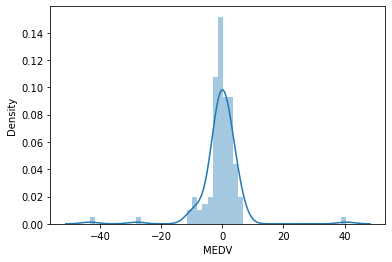

In [114]:
sns.distplot(y_test-prediction)

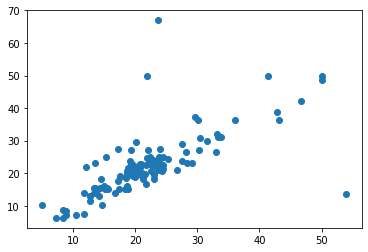

In [115]:
plt.scatter(y_test,prediction)

In [116]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=50,min_samples_leaf=2,min_weight_fraction_leaf=0.1,splitter='random')

In [119]:
tuned_hyper_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=50,
                      min_samples_leaf=2, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [120]:
tuned_pred=tuned_hyper_model.predict(x_test)

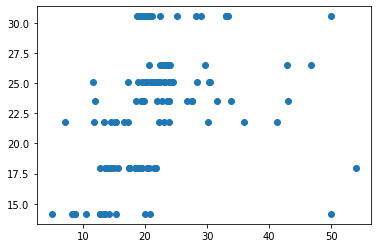

In [121]:
plt.scatter(y_test,tuned_pred)

Observation: the above scatter plot looks lot better.

### With hyperparameter tuning 

In [122]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 5.393635502457592
MSE: 64.123388662037
RMSE: 8.007708077973184


### Without hyperparameter tuning 

In [123]:
print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 3.409836065573771
MSE: 47.03622950819671
RMSE: 6.85829639985009


# 3. Conclusion
From the above observationa and evaluation, the conclusion is drawn: Linear regression is not a good model, Decision Tree model gave the good metric value (MSE64) with hyperparameter tuning compare to the model without hyper parameter tuning.


# References
1. www.kaggle.com. (n.d.). Real Estate DataSet. [online] Available at: https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset [Accessed 25 Mar. 2022].
2. www.nbshare.io. (n.d.). Decision Tree Regression With Hyper Parameter Tuning In Python. [online] Available at: https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/ [Accessed 25 Mar. 2022].

‌
‌